In [41]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Imports for modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

In [42]:
df = pd.read_csv(r"C:\Users\ADMIN\Desktop\data science\students stress level\academic Stress level - maintainance 1.csv")
df.head()

,Timestamp,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,24/07/2025 22:05:39,undergraduate,4,5,Noisy,Analyze the situation and handle it with intel...,No,3,5
1,24/07/2025 22:05:52,undergraduate,3,4,Peaceful,Analyze the situation and handle it with intel...,No,3,3
2,24/07/2025 22:06:39,undergraduate,1,1,Peaceful,"Social support (friends, family)",No,2,4
3,24/07/2025 22:06:45,undergraduate,3,2,Peaceful,Analyze the situation and handle it with intel...,No,4,3
4,24/07/2025 22:08:06,undergraduate,3,3,Peaceful,Analyze the situation and handle it with intel...,No,4,5


In [43]:
df.shape

(140, 9)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140 entries, 0 to 139
Data columns (total 9 columns):
 #   Column                                                               Non-Null Count  Dtype 
---  ------                                                               --------------  ----- 
 0   Timestamp                                                            140 non-null    object
 1   Your Academic Stage                                                  140 non-null    object
 2   Peer pressure                                                        140 non-null    int64 
 3   Academic pressure from your home                                     140 non-null    int64 
 4   Study Environment                                                    139 non-null    object
 5   What coping strategy you use as a student?                           140 non-null    object
 6   Do you have any bad habits like smoking, drinking on a daily basis?  140 non-null    object
 7   What would you rat

In [45]:
df.describe()

,Peer pressure,Academic pressure from your home,What would you rate the academic competition in your student life,Rate your academic stress index
count,140.000000,140.000000,140.000000,140.000000
mean,3.071429,3.178571,3.492857,3.721429
std,1.083844,1.276618,1.028349,1.032339
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,3.000000,3.000000
50%,3.000000,3.000000,4.000000,4.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [46]:
df['Rate your academic stress index '].value_counts()

Rate your academic stress index 
4    56
3    36
5    33
2     9
1     6
Name: count, dtype: int64

In [47]:
df.columns

Index(['Timestamp', 'Your Academic Stage', 'Peer pressure',
       'Academic pressure from your home', 'Study Environment',
       'What coping strategy you use as a student?',
       'Do you have any bad habits like smoking, drinking on a daily basis?',
       'What would you rate the academic  competition in your student life',
       'Rate your academic stress index '],
      dtype='object')

In [48]:
# Clean column names in one step
df.columns = (
    df.columns
    .str.strip()                       # remove leading/trailing spaces
    .str.replace(r'\s+', ' ', regex=True)  # replace multiple spaces with one
)

# Safely convert Timestamp column to datetime
df = df.assign(
    Timestamp=lambda x: pd.to_datetime(x['Timestamp'], errors='coerce')
) if 'Timestamp' in df.columns else df

# Show cleaned columns
print("Cleaned columns:\n", df.columns.tolist())

Cleaned columns:
 ['Timestamp', 'Your Academic Stage', 'Peer pressure', 'Academic pressure from your home', 'Study Environment', 'What coping strategy you use as a student?', 'Do you have any bad habits like smoking, drinking on a daily basis?', 'What would you rate the academic competition in your student life', 'Rate your academic stress index']


In [49]:
df.columns

Index(['Timestamp', 'Your Academic Stage', 'Peer pressure',
       'Academic pressure from your home', 'Study Environment',
       'What coping strategy you use as a student?',
       'Do you have any bad habits like smoking, drinking on a daily basis?',
       'What would you rate the academic competition in your student life',
       'Rate your academic stress index'],
      dtype='object')

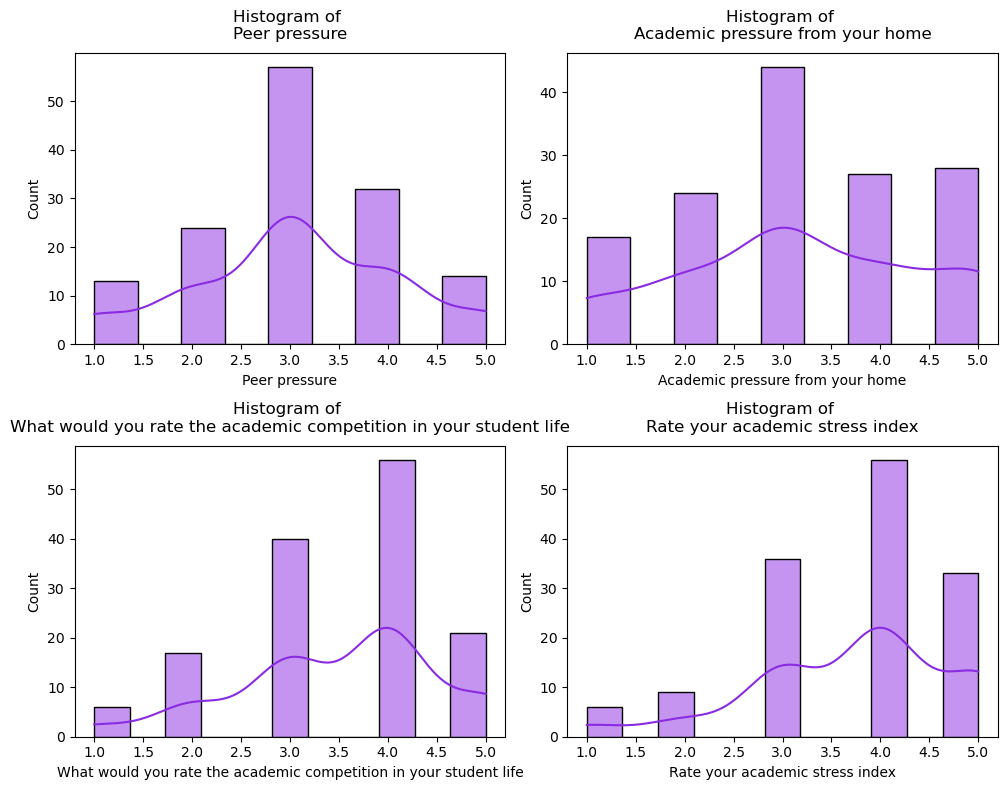

In [50]:
# Histogram of numerical variables
plt.figure(figsize=(10, 8))
for i, col in enumerate(numeric_df.columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(numeric_df[col], kde=True, color='blueviolet')
    plt.title(f'Histogram of \n{col}', pad=10)
plt.tight_layout()
plt.show()

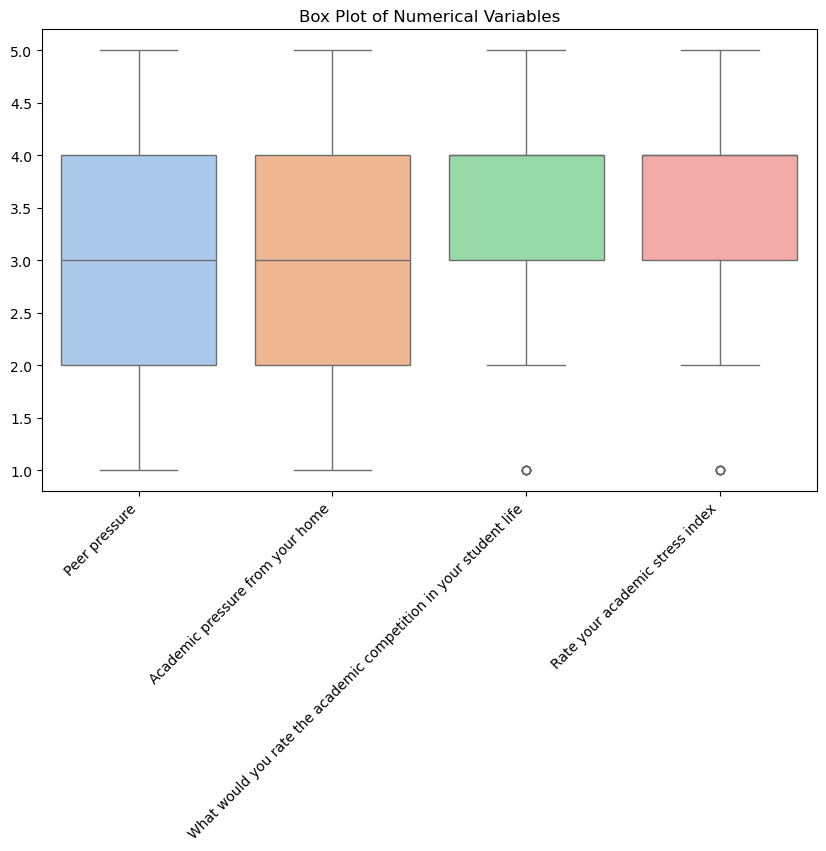

In [51]:
# Box plot for numerical data to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=numeric_df, palette='pastel')
plt.title('Box Plot of Numerical Variables')
plt.xticks(rotation=45, ha = 'right')
plt.show()

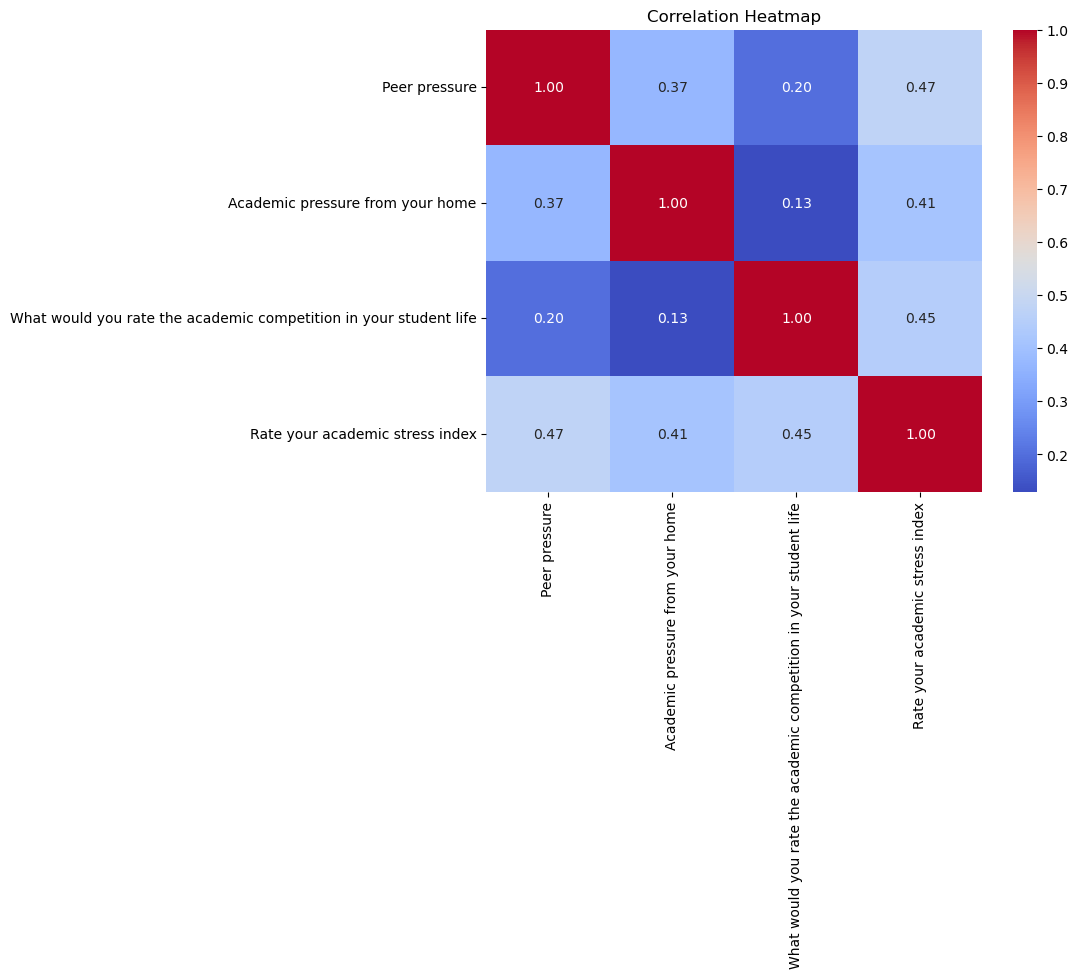

In [52]:
# Heatmap of correlations if 4 or more numeric columns exist
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(8,6))
    corr_matrix = numeric_df.corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

In [53]:
#predicting model
# Define the target and feature columns
target = 'Rate your academic stress index'
feature_columns = [
    'Peer pressure', 
    'Academic pressure from your home', 
    'What would you rate the academic competition in your student life'
]

In [54]:
# Verify if the chosen columns exist in the dataframe
for col in feature_columns + [target]:
    if col not in df.columns:
        available = df.columns.tolist()
        raise ValueError(f"Required column '{col}' is missing from the dataset. Available columns are: {available}")

In [55]:
# Prepare the data for modeling
X = df[feature_columns]
y = df[target]

In [56]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

In [57]:
# Evaluate the model using R-squared and Mean Absolute Error
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print('Linear Regression Model Performance:')
print(f'R-squared: {r2:.3f}')
print(f'Mean Absolute Error: {mae:.3f}')

Linear Regression Model Performance:
R-squared: 0.499
Mean Absolute Error: 0.614


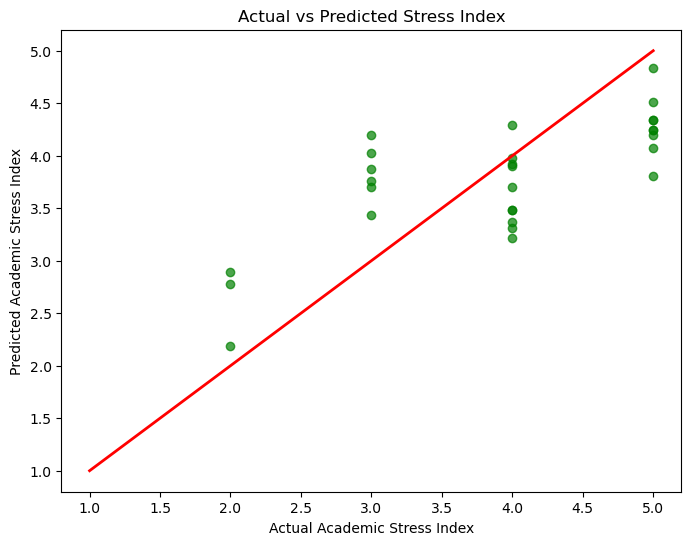

In [58]:
# Plot Actual vs Predicted values
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='green')
plt.xlabel('Actual Academic Stress Index')
plt.ylabel('Predicted Academic Stress Index')
plt.title('Actual vs Predicted Stress Index')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.show()

In this analysis, the dataset was prepared using Python libraries such as Pandas and NumPy for data handling, and Matplotlib and Seaborn for visualization. 
The modeling process was carried out using Scikit-learn, where the dataset was split into training and testing subsets to build and evaluate a Linear Regression model.
The model achieved an R² of 0.499 (moderate fit) and a MAE of 0.614, meaning it captures some relationships in the data but leaves room for improvement.